# LA County COVID-19 Cases by Neighborhoods

Use LA County's [countywide statistical areas](http://geohub.lacity.org/datasets/lacounty::countywide-statistical-areas-csa) and look at trends in cases and new cases by neighborhood.

**Related daily reports:** 
1. **[US counties report on cases and deaths for select major cities](https://cityoflosangeles.github.io/covid19-indicators/us-county-trends.html)**
1. **[CA counties report on cases, deaths, and hospitalizations](https://cityoflosangeles.github.io/covid19-indicators/ca-county-trends.html)**
1. **[Los Angeles County, detailed indicators](https://cityoflosangeles.github.io/covid19-indicators/coronavirus-stats.html)**

Code available in GitHub: [https://github.com/CityOfLosAngeles/covid19-indicators](https://github.com/CityOfLosAngeles/covid19-indicators)
<br>
Get informed with [public health research](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/reopening-sources.md)

In [1]:
import pandas as pd

import default_parameters
import make_charts
import neighborhood_charts

from datetime import date
from IPython.display import Markdown, HTML

# Default parameters
start_date = default_parameters.start_date
today_date = default_parameters.today_date

fulldate_format = default_parameters.fulldate_format

start_date = date(2020, 4, 1)

In [2]:
df = neighborhood_charts.prep_data(start_date)

# Construct list again, because we change the "/" into "-"
la_neighborhoods = sorted(list(df[df.group_name=="City of LA"].aggregate_region.unique()))
unincorporated_neighborhoods = sorted(list(df[df.group_name=="Unincorporated"].aggregate_region.unique()))
incorporated_neighborhoods = sorted(list(df[df.group_name=="Incorporated"].aggregate_region.unique()))


data_through = df.date.max()
neighborhoods = list(df.aggregate_region.unique())

In [3]:
display(Markdown(
        f"Report updated: {default_parameters.today_date.strftime(fulldate_format)}; "
        f"data available through {data_through.strftime(fulldate_format)}."
    )
)

Report updated: 12/26/20; data available through 12/24/20.

<strong><span style='color:f"#515252"'>The 25th and 75th percentile of cases and cases per 100k are calculated each day and drawn in gray.</span></strong>

<strong><span style='color:#1696D2'>The neighborhood's own trend is drawn in blue.</span></strong>

The percentiles provide context to whether a neighborhood's cases are relatively high or lower compared to other parts of the county. Data from the past 2 weeks are shaded in gray.

**Note:** Some neighborhoods report cases, but do not have population data. Rankings are calculated using cases per 100k to normalize across population differences. Neighborhoods without population data are excluded from the rankings.
Also, since rolling averages are used, decimals are possible, and are rounded to 1 decimal place. 

In [ ]:
#References
#https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
#https://stackovearflow.com/questions/7572901/python-html-combine-multiple-htmls-into-one

<a id='top'></a>

## Neighborhoods by Group:
Select neighborhoods within the City of LA, other incorporated cities in LA County, and unincorporated areas in LA County.

In [ ]:
for list_name in [la_neighborhoods, unincorporated_neighborhoods, incorporated_neighborhoods]:
    combined_html = ""
    for i, name in enumerate(list_name):
        new_name = name.replace(" - ", "-").replace(" ", "-")
        
        if i < len(list_name)-1:
            name_html = f"<a href=#{new_name}>{name}, </a>"
            combined_html += name_html

        elif i == len(list_name)-1:
            name_html = f"<a href=#{new_name}>{name}</a>"
            combined_html += name_html
    
    if list_name == la_neighborhoods:
        group_title = "City of LA: "
    elif list_name == incorporated_neighborhoods:
        group_title = "LA County - Incorporated Cities: "
    elif list_name == unincorporated_neighborhoods:
        group_title = "LA County - Unincorporated: "

    display(Markdown(f"<strong>{group_title}</strong>"))
    display(HTML(combined_html))

#### Hacienda Heights (Unincorporated)

Cumulative cases reported in Hacienda Heights: 1,513 cases a month ago; 2,024 cases 2 weeks ago; 2,468 cases 1 week ago; 2,842 cases yesterday. This translates to a <strong>15.2% </strong> change in the past week. Of those tested so far, 15.9% tested positive, with persons testing positive at a rate of 50.15 per 1k. As of 12/24/20, Hacienda Heights ranked <strong> 88 out of 167 </strong> neighborhoods on cases per 100k <i>(1 being the most severely hit)</i>.

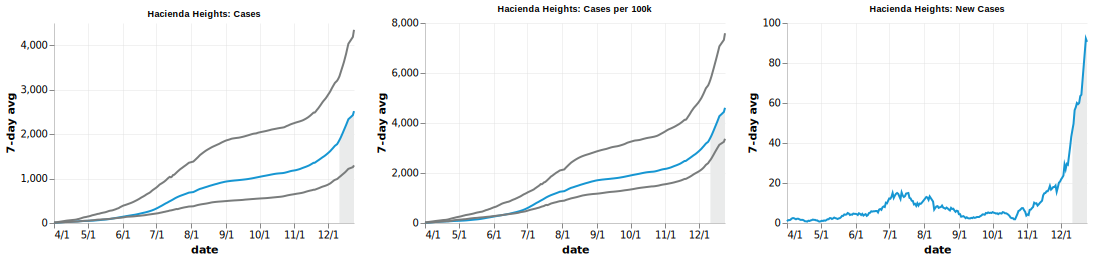

In [5]:
for c in neighborhoods:
    id_anchor = c.replace(" - ", "-").replace(" ", "-")

    display(HTML(f"<a id={id_anchor}></a>"))
    neighborhood_charts.make_chart(df, c)
    display(HTML(
        "<br>"
        "<a href=#top>Return to top</a><br>"
    ))